In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sympy import *
from scipy.optimize import fsolve
import math
from matplotlib.colors import LogNorm
from numpy import genfromtxt
import pandas as pd

plt.rcParams['axes.grid'] = False
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
plt.rcParams.update({"font.size": 15, "font.family": "serif"})

In [2]:
def f(x):
    return np.sin(x)
minimize(f, 0.1)

      fun: -0.9999999999999964
 hess_inv: array([[1.00005774]])
      jac: array([9.68575478e-08])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([-1.57079624])

In [6]:
def e0phi(lamb1, lamb2, lamb3):
    return 1/2*(2*lamb1 + lamb2)

def e1phi(lamb1, lamb2, lamb3):
    return 1/2*(2*lamb1 - lamb2)

def e2phi(lamb1, lamb2, lamb3):
    return 1/2*(-2*lamb1 + lamb3)

def e3phi(lamb1, lamb2, lamb3):
    return 1/2*(-2*lamb1 - lamb3)


e0t = 1/2*3
e1t = 1/2*1
e2t = 1/2*(-1)
e3t = 1/2*(-3)

e0AdS = complex(0, e0t)
e1AdS = complex(0, e1t)
e2AdS = complex(0, e2t)
e3AdS = complex(0, e3t)


In [101]:
def Qn(n, lamb1, lamb2, lamb3):
    return 1/n*(e0phi(lamb1, lamb2, lamb3)**n + e1phi(lamb1, lamb2, lamb3)**n + e2phi(lamb1, lamb2, lamb3)**n + e3phi(lamb1, lamb2, lamb3)**n)

def QnAdS(n):
    return 1/n*(e0AdS**n + e1AdS**n + e2AdS**n + e3AdS**n)

def S(lamb1, lamb2, lamb3):
    return e0phi(lamb1, lamb2, lamb3)*e0t + e1phi(lamb1, lamb2, lamb3)*e1t + e2phi(lamb1, lamb2, lamb3)*e2t + e3phi(lamb1, lamb2, lamb3)*e3t

def Gamma(lambs, mu3, mu4):
    lamb1, lamb2, lamb3 = lambs
    return np.real(5*(Qn(2, lamb1, lamb2, lamb3) - QnAdS(2)) + mu3*(Qn(3, lamb1, lamb2, lamb3) - QnAdS(3)) + mu4*(Qn(4, lamb1, lamb2, lamb3) - QnAdS(4)))

In [104]:
def dQdlambda(lambs):
    lamb1, lamb2, lamb3 = lambs
    return 1/32*lamb2*lamb3*(4*lamb1 + lamb2 + lamb3)*(4*lamb1 - lamb2 + lamb3)*(4*lamb1 + lamb2 - lamb3)*(4*lamb1 - lamb2 - lamb3)

def const_real(lambs):
    lamb1, lamb2, lamb3 = lambs
    return np.sum(np.iscomplex(lamb1)) + np.sum(np.iscomplex(lamb2)) + np.sum(np.iscomplex(lamb3))


bnds = ((0, None), (0, None), (0, None))
cons = {'type':'ineq', 'fun':dQdlambda}

mu30 = 0.1
mu3f = 4*np.pi
mu40 = 0.1
mu4f = 2*np.pi**2/5
n = 100
mu3list = np.linspace(mu30, mu3f, n)
mu4list = np.linspace(mu40, mu4f, n)

Q2_array = np.zeros((n, n))

for y in range(len(mu4list)):
    for x in range(len(mu3list)):
        res = minimize(Gamma, (0.2, 0.2, 0.2), args=(mu3list[x], mu4list[y]), bounds=bnds, constraints=cons)
        lamb1 = res.x[0]
        lamb2 = res.x[1]
        lamb3 = res.x[2]
        #print(res.x)
        #print(res)
        #lamb1, lamb2, lamb3 =  res
        Q2_array[(n-1) - y, x] = np.log(2*lamb1**2 + 1/4*lamb2**2+1/4*lamb3**2)


<ipython-input-104-24ff21bb8e81>:32: RuntimeWarning: divide by zero encountered in log
  Q2_array[(n-1) - y, x] = np.log(2*lamb1**2 + 1/4*lamb2**2+1/4*lamb3**2)


In [100]:
Gamma((1,1,1),1,1)

(25+0j)

In [20]:
def D1Gamma(lamb1, lamb2, lamb3, mu3, mu4):
    return -4 + 20*lamb1 + 1/2*(lamb2**2 - lamb3**2)*mu3 + 1/32*(128*lamb1**3 + 48*lamb1*(lamb2**2 + lamb3**2))*mu4

def D2Gamma(lamb1, lamb2, lamb3, mu3, mu4):
    return -(1/2) + 5*lamb2/2 + lamb1*lamb2*mu3 + 1/32*(48*lamb1**2*lamb2 + 4*lamb2**3)*mu4

def D3Gamma(lamb1, lamb2, lamb3, mu3, mu4):
    return -(1/2) + 5*lamb3/2 - lamb1*lamb3*mu3 + 1/32*(48*lamb1**2*lamb3 + 4*lamb3**3)*mu4

In [91]:
def equations(x, mu3, mu4):
    lamb1, lamb2, lamb3 = x
    return (D1Gamma(lamb1, lamb2, lamb3, mu3, mu4), D2Gamma(lamb1, lamb2, lamb3, mu3, mu4), D3Gamma(lamb1, lamb2, lamb3, mu3, mu4))






#lamb1, lamb2, lamb3 =  fsolve(equations, (1, 1, 1), args=(1, 1))

In [81]:
Q2_array[9, 0]=1
Q2_array

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

In [65]:
len(mu3list)

50

In [92]:



for y in range(len(mu4list)):
    for x in range(len(mu3list)):
        lamb1, lamb2, lamb3 =  fsolve(equations, (1, 1, 1), args=(mu3list[x], mu4list[y]), xtol=1.49012e-10)
        Q2_array[(n-1) - y, x] = np.log(2*lamb1**2 + 1/4*lamb2**2+1/4*lamb3**2)
        #print(Q2_array)

/Users/javier/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/javier/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


In [63]:
Q2_array

array([[-2.30428603, -2.31517685, -2.3212319 , ..., -2.50857763,
        -2.5109971 , -2.51165356],
       [-2.24966072, -2.25342294, -2.26656604, ..., -2.48060537,
        -2.48339587, -2.48428284],
       [-2.18588691, -2.19515184, -2.20758713, ..., -2.45224873,
        -2.45576685, -2.45830642],
       ...,
       [-2.41193555, -2.41001186, -2.40807832, ..., -2.30862183,
        -2.306071  , -2.30350176],
       [-2.41291111, -2.41099545, -2.40907005, ..., -2.31014241,
        -2.30760849, -2.3050565 ],
       [-2.41337016, -2.41145828, -2.4095367 , ..., -2.31085695,
        -2.30833096, -2.30578703]])

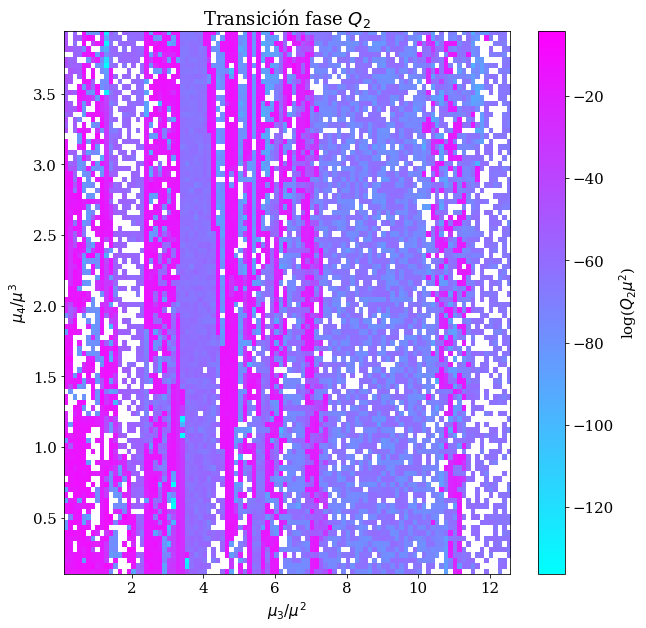

In [105]:
fig, ax = plt.subplots(figsize=(10,10))

c = ax.imshow(Q2_array, cmap ='cool', interpolation ='nearest', origin ='lower', extent =[mu30, mu3f, mu40, mu4f],aspect='auto')
ax.set_title("Transición fase $Q_2$")
ax.set_xlabel("$\mu_3/\mu^2$")
ax.set_ylabel("$\mu_4/\mu^3$", rotation=90)

fig.colorbar(c, ax=ax, label='log($Q_2\mu^2$)')

In [31]:
res = minimize(Gamma, args=(6, 9))
res.x

TypeError: minimize() missing 1 required positional argument: 'x0'

In [26]:
Gamma((0,0,0),1,1)

(9.9375+0j)

In [16]:
f = lambdify((x,z), yprime, 'numpy')
f(4,2)

10

In [ ]:
-4 + 20*lamb1 + 1/2 (lamb2**2 - lamb3**2)*mu3 + 1/32 (128*lamb1^3 + 48*lamb1 (lamb2**2 + lamb3**2))*mu4